In [1]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.ioff()
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
import datetime
import numpy as np
import torch
import mantrap

In [3]:
env = mantrap.environment.Trajectron(ego_position=torch.tensor([-4, 1]))
env.add_ado(position=torch.tensor([5, 0]), velocity=torch.tensor([1.0, -0.5]), color=np.array([1, 0, 0]))
env.add_ado(position=torch.tensor([5, -6]), velocity=torch.tensor([-1, 0]), color=np.array([0.5, 0.1, 1.0]))
env.add_ado(position=torch.tensor([-7, -5]), velocity=torch.tensor([0.1, 1.3]), color=np.array([0, 0, 1]))
env.add_ado(position=torch.tensor([2, 2]), velocity=torch.tensor([-1, -1]), color=np.array([1, 0, 1]))
env.add_ado(position=torch.tensor([-5, 4]), velocity=torch.tensor([0.5, 0.5]), color=np.array([0, 1, 0]))

goal = torch.tensor([3, -1])

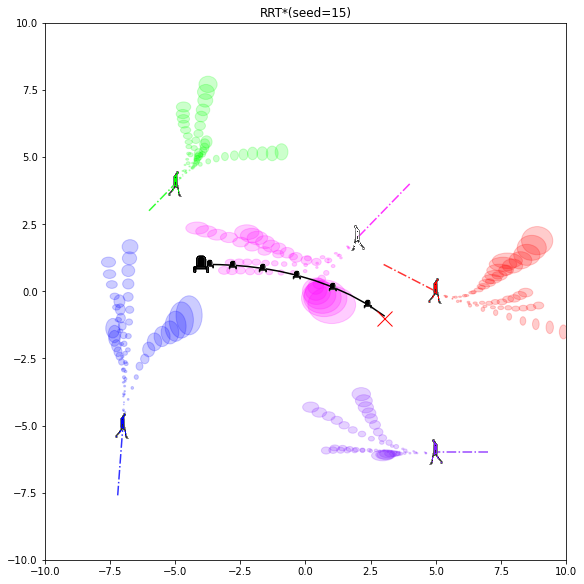

In [5]:
solver = mantrap.solver.baselines.RRTStarSolver(env=env, goal=goal, is_logging=True)

ego_trajectory, _,  = solver.solve(time_steps=20, max_cpu_time=20.0)
ado_samples = env.sample_w_trajectory(ego_trajectory, num_samples=5)
ado_dist_dict = env.compute_distributions(ego_trajectory, vel_dist=False)

mantrap.visualization.visualize_prediction(env, ego_planned=ego_trajectory, ego_goal=goal,
                                           title=f"RRT*(seed=15)", ado_pos_gmm=ado_dist_dict, grid=False)    

date_string = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
plt.savefig(f"qualitative_{date_string}.png", bbox_inches='tight')
plt.show()